In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
from scipy.optimize import curve_fit
import seaborn as sns
sns.set()

In [2]:
plt.rcParams['figure.figsize'] = [10, 7]

In [3]:
days_since_first = 26  #first case March 6th

In [4]:
days = np.array(range(days_since_first))
time_since_first = np.array(range(days_since_first-1))
time_since_first

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [5]:
days

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [6]:
days_short = days[0:-11]
days_short

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [7]:
cases = [1, 5, 5, 9, 13, 22, 23, 26, 27, 35, 41, 50, 69, 89, 113, 117,134, 158, 177,201,231,263,295, 314,330, 347]
new_cases_per_day = np.diff(cases)
new_cases_per_day

array([ 4,  0,  4,  4,  9,  1,  3,  1,  8,  6,  9, 19, 20, 24,  4, 17, 24,
       19, 24, 30, 32, 32, 19, 16, 17])

In [8]:
cases

[1,
 5,
 5,
 9,
 13,
 22,
 23,
 26,
 27,
 35,
 41,
 50,
 69,
 89,
 113,
 117,
 134,
 158,
 177,
 201,
 231,
 263,
 295,
 314,
 330,
 347]

In [9]:
cases_short = cases[0:-11]
cases_short

[1, 5, 5, 9, 13, 22, 23, 26, 27, 35, 41, 50, 69, 89, 113]

In [10]:
recovered = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,4,4])
deaths = np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,2,2,2,2,2])
print(len(recovered),len(deaths))

26 26


In [11]:
active = cases - recovered - deaths
active

array([  1,   5,   5,   9,  13,  22,  23,  26,  27,  35,  41,  50,  68,
        87, 109, 113, 130, 154, 173, 197, 227, 258, 290, 309, 324, 341])

In [12]:
pdata = {'Days': days, 'Cases': np.array(cases).astype('float64'), 'Recovered': recovered, 'Deaths': deaths}
data = pd.DataFrame(pdata)
data.head()

,Days,Cases,Recovered,Deaths
0,0,1.0,0,0
1,1,5.0,0,0
2,2,5.0,0,0
3,3,9.0,0,0
4,4,13.0,0,0


In [13]:
data.describe()

,Days,Cases,Recovered,Deaths
count,26.000000,26.000000,26.000000,26.000000
mean,12.500000,119.038462,1.192308,1.038462
std,7.648529,115.056675,1.414757,0.999230
min,0.000000,1.000000,0.000000,0.000000
25%,6.250000,23.750000,0.000000,0.000000
50%,12.500000,79.000000,0.000000,1.500000
75%,18.750000,195.000000,2.000000,2.000000
max,25.000000,347.000000,4.000000,2.000000


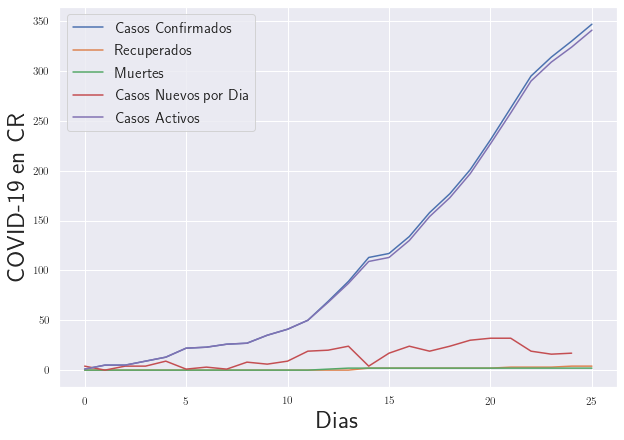

In [14]:
plt.plot(days, cases, label='Casos Confirmados')
plt.plot(days, recovered, label='Recuperados')
plt.plot(days, deaths, label='Muertes')
plt.plot(time_since_first, new_cases_per_day, label='Casos Nuevos por Dia')
plt.plot(days, active, label='Casos Activos')
plt.xlabel('Dias', fontsize=25)
plt.ylabel('COVID-19 en CR', fontsize=25)
plt.legend(loc='best', fontsize=15)
plt.show()

## Exponentials

In [15]:
def ExpFit(x, n, a):
    f = n*np.exp(a*x)
    return f

In [16]:
def SigFit(x, n, b, c):
    f = n*(1/(1+np.exp(-b*(x-c))))
    return f

In [17]:
#PArameters EXP
p = [1,1]
#Fit
c, cov = curve_fit(ExpFit, days_short, cases_short)

#Parameters Exp2
p1 = [1,1]
c1, cov1 = curve_fit(ExpFit, days, cases)

In [18]:
c

array([4.57709   , 0.22745685])

In [19]:
c1

array([17.44635823,  0.12431765])

In [20]:
N_0, a = c[0], c[1]
N_0, a 

(4.577090000373798, 0.22745684999031793)

In [21]:
n, b1 = c1[0], c1[1]
n, b1

(17.446358234730944, 0.12431764907871586)

In [22]:
perr = np.sqrt(np.diag(cov))
N_0_pm, a_pm = perr[0], perr[1]
N_0_pm, a_pm

(0.540296879921435, 0.00947202416007359)

In [27]:
perr1 = np.sqrt(np.diag(cov1))
n_pm, b1_pm = perr1[0], perr1[1]
n_pm, b1_pm

(2.190043396148343, 0.0057461783612582865)

In [29]:
from uncertainties import unumpy


In [30]:
variables = unumpy.uarray([N_0, a], (N_0_pm.round(1), a_pm.round(2)))
variables

array([4.577090000373798+/-0.5, 0.22745684999031793+/-0.01], dtype=object)

In [31]:
variables1 = unumpy.uarray([n, b1], (n_pm.round(1), b1_pm.round(2)))
variables1

array([17.446358234730944+/-2.2, 0.12431764907871586+/-0.01], dtype=object)

In [32]:
t = np.arange(0,days_since_first, 0.2)
t

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8, 20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8,
       22. , 22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. ,
       24.2, 24.4, 24.6, 24.8, 25. , 25.2, 25.4, 25.6, 25.8])

In [33]:
predicted = ExpFit(t, N_0, a)

In [34]:
predicted1 = ExpFit(t, n, b1)

In [35]:
#next three days:
xs = np.array([days_since_first + 1, days_since_first + 2, days_since_first +3])
pred_next_three = ExpFit(xs, N_0, a)
pred_next_three = variables[0]*unumpy.exp(variables[1]*xs) 
pred_next_three

array([2126.852305467987+/-619.470388500269,
       2670.0573346724036+/-802.4991131646973,
       3351.998703487412+/-1038.7590063805724], dtype=object)

In [36]:
pred1_next_three =ExpFit(t, n, b1)
pred1_next_three = variables1[0]*unumpy.exp(variables1[1]*xs) 
pred1_next_three

array([500.5499804674891+/-149.16172370547523,
       566.8105403706501+/-174.05921637773525,
       641.8423758107316+/-202.96981730020903], dtype=object)

In [37]:
#Sigmoid
#pred_sig_next_three = SigFit(xs, n, b1, c1)
#pred_sig_next_three

In [38]:
tau = 1/variables[1]
tau

4.396438269687488+/-0.1932866945917272

In [39]:
tau1 = 1/variables1[1]
tau1

8.043910156045637+/-0.6470449059853415

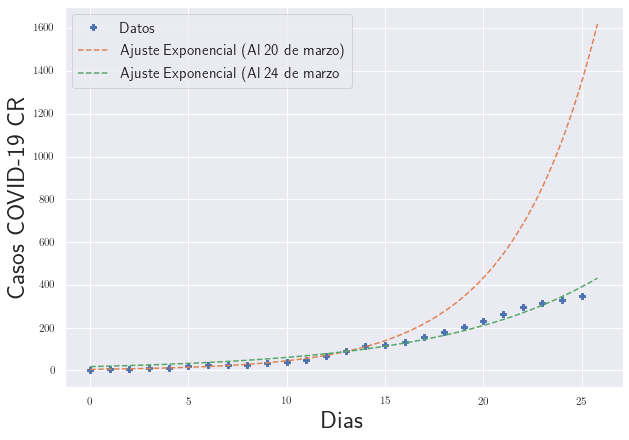

In [40]:
plt.plot(days, cases, 'P', label='Datos')
plt.plot(t, predicted, '--', label='Ajuste Exponencial (Al 20 de marzo)')
plt.plot(t, predicted1, '--', label='Ajuste Exponencial (Al 24 de marzo')
plt.xlabel('Dias', fontsize=25)
plt.ylabel('Casos COVID-19 CR', fontsize=25)
plt.legend(loc='best',fontsize=15)
plt.show()

## ARIMA Model

In [41]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [42]:
res = adfuller(data['Cases'])
print('ADF Statistic: %f' %res[0])
print('p-Value: %f' %res[1])

ADF Statistic: -2.095668
p-Value: 0.246260


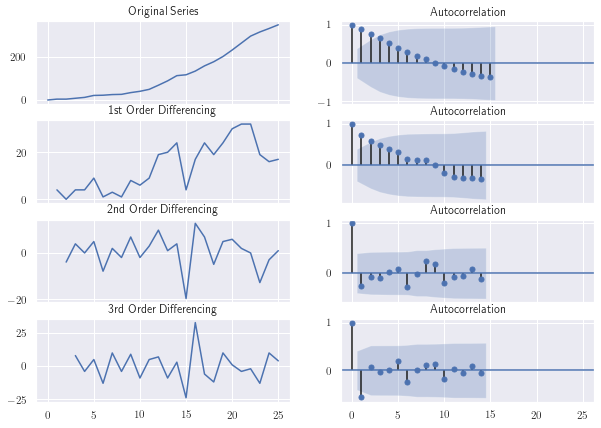

In [43]:
fig, axes = plt.subplots(4, 2, sharex=True)
#Cases
axes[0, 0].plot(data['Cases']); axes[0, 0].set_title('Original Series')
plot_acf(data['Cases'], ax=axes[0, 1])

#1st Difference
diff1 = data['Cases'].diff()
axes[1, 0].plot(diff1); axes[1, 0].set_title('1st Order Differencing')
plot_acf(diff1.dropna(), ax=axes[1,1])


#2nd Difference
diff2 = diff1.diff()
axes[2, 0].plot(diff2); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(diff2.dropna(), ax=axes[2,1])


#3rd Difference
diff3 = diff2.diff()
axes[3, 0].plot(diff3); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(diff3.dropna(), ax=axes[3,1])

plt.show()




/home/andres/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/home/andres/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


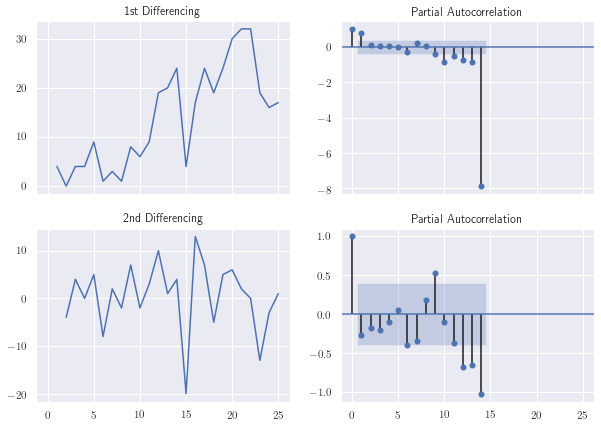

In [44]:
fig, axes = plt.subplots(2, 2, sharex=True)

axes[0,0].plot(diff1); axes[0,0].set_title('1st Differencing')
plot_pacf(diff1.dropna(), ax=axes[0,1])

axes[1,0].plot(diff2); axes[1,0].set_title('2nd Differencing')
plot_pacf(diff2.dropna(), ax=axes[1,1])

plt.show()


# 1 order of lag is enough

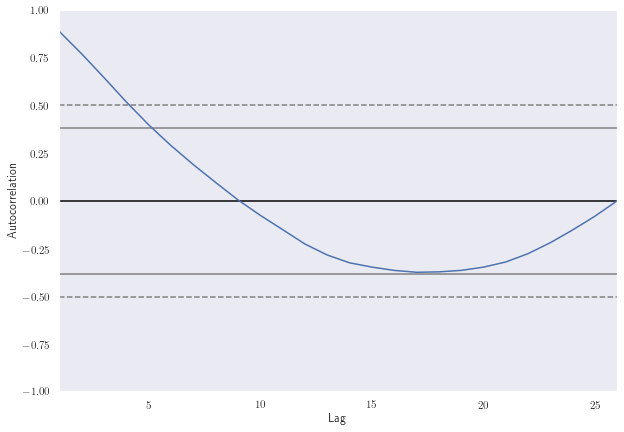

In [45]:
pd.plotting.autocorrelation_plot(data['Cases']) #Basically no significant autocorrelation

In [46]:
model = ARIMA(data['Cases'], order=(2,2,1))

In [47]:
model_fit = model.fit()

In [48]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Cases   No. Observations:                   24
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -78.025
Method:                       css-mle   S.D. of innovations              5.926
Date:                Tue, 31 Mar 2020   AIC                            166.050
Time:                        15:03:35   BIC                            171.940
Sample:                             2   HQIC                           167.613
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.0368      0.264      3.927      0.000       0.519       1.554
ar.L1.D2.Cases     0.4383      0.212      2.065      0.039       0.022       0.854
ar.L2.D2.Cases    -0.0712      0.227     -0.313      0.754      -0.517       0.375
ma.L1.D2.Cases    -1.0000      0.126     -7.935      0.000      -1.247      -0.753
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.0766           -2.1385j            3.7468           -0.0967
AR.2            3.0766           +2.1385j            3.7468            0.0967
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

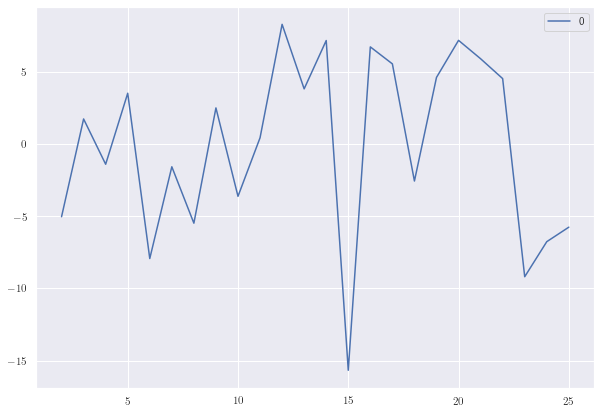

In [49]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

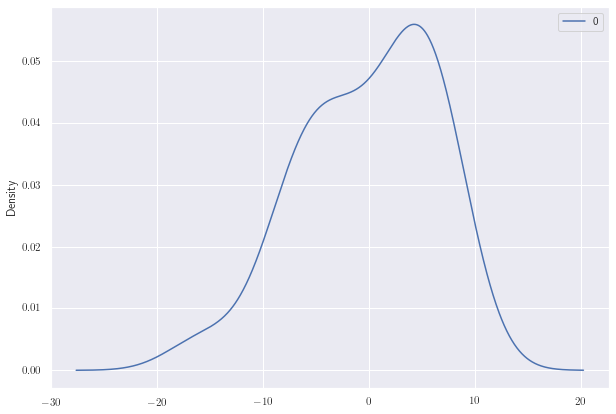

In [50]:
residuals.plot(kind='kde')

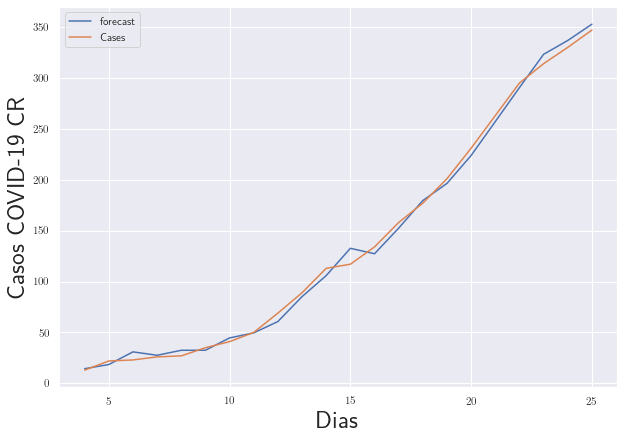

In [51]:
model_fit.plot_predict(dynamic=False)
plt.xlabel('Dias', fontsize=25)
plt.ylabel('Casos COVID-19 CR', fontsize=25)
plt.show()

In [52]:
forecast = model_fit.forecast(3)

In [53]:
d1, d2, d3 = forecast[0][0], forecast[0][1], forecast[0][2]
d1, d2, d3

(371.0684731867317, 398.8200514777992, 428.3386605692783)

In [54]:
pms = (abs(forecast[2][:,0] - forecast[2][:,1])/2).round(0)
pms

array([12., 20., 27.])

# Model
$ N(t) = N_0e^{at}$  



$N(t) = N_0\left(\frac{1}{1+ae^{-bx}}\right)$

Con t en días

### Al 18 de marzo 

$N_0 = 5.5 \pm 0.7$, 


$a = 0.20 \pm 0.01$

#### Predicciones: 

$19/3: 81 \pm 11$, 

$20/3: 99 \pm 14$

$21/3 :122 \pm 17$


### Al 19 de Marzo 

$N_0 = 5.0 \pm 0.7$

$a = 0.22 \pm 0.01  \Rightarrow \tau_c = 4.6 \pm 0.2$

#### Predicciones:


$20/3: 133  \pm 27$

$21/3: 166 \pm 35$

$222/3 :200 \pm 28$

### Al 20 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

#### Predicciones:


$21/3: 174  \pm 34$,                                                        ARIMA: $135 \pm 9$

$22/3: 218 \pm 44$,                                                         ARIMA : $155 \pm 19$

$23/3 :274 \pm 57$,                                                         ARIMA: $173 \pm 30$

### Al 21 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$



#### Predicciones:


$22/3: 174  \pm 34$,                                                       ARIMA: $135 \pm 9$

$23/3: 218 \pm 44$,                                                         ARIMA : $155 \pm 19$

$24/3 :274 \pm 57$,                                                         ARIMA: $173 \pm 30$

### Al 22 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

$n = 6.7 \pm 0.9$

$b_1 = 0.19 \pm 0.01$


#### Predicciones:

###### Exponentials


$23/3:$ exp 1$274  \pm 57$,   exp2  $210 \pm 47$                                         ARIMA: $144 \pm 13$

$25/3:$  exp 1$344 \pm 75$,     exp 2 $254 \pm 59$                                       ARIMA : $160 \pm 22$

$25/3:$ exp1$432 \pm 98$,       exp 2$308 \pm 74$                                             ARIMA: $174 \pm 36$

### Al 23 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

$n = 7.4 \pm 0.9$

$b_1 = 0.18 \pm 0.01$


#### Predicciones:

###### Exponentials, ARIMA (2,2,0)

$24/3:$ exp1 $344  \pm 75$,   exp2  $238 \pm 53$                                         ARIMA: $176 \pm 13$

$25/3:$  exp1 $432 \pm 98$,     exp 2 $286 \pm 66$                                       ARIMA : $198 \pm 24$

$26/3:$ exp1 $513 \pm 128$,       exp2 $343 \pm 83$                                        ARIMA: $221 \pm 35$

### Al 24 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

$n = 8.4 \pm 0.1$

$b_1 = 0.17 \pm 0.01$


#### Predicciones:

###### Exponentials, ARIMA (2,2,0)

$25/3:$ exp1 $432  \pm 98$,   exp2  $265 \pm 61$                                         ARIMA: $199 \pm 13$

$26/3:$  exp1 $543 \pm 128$,     exp 2 $315 \pm 76$                                       ARIMA : $222 \pm 23$

$27/3:$ exp1 $682 \pm 167$,       exp2 $374 \pm 93$                                        ARIMA: $246 \pm 34$

### Al 25 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

$n = 9.3 \pm 0.1$

$b_1 = 0.16 \pm 0.01$


#### Predicciones:

###### Exponentials, ARIMA (2,2,1)

$26/3:$ exp1 $543  \pm 128$,   exp2  $295 \pm 71$                                         ARIMA: $224 \pm 10$

$27/3:$  exp1 $682 \pm 167$,     exp 2 $348 \pm 87$                                       ARIMA : $248 \pm 15$

$28/3:$ exp1 $856 \pm 218$,       exp2 $312 \pm 106$                                        ARIMA: $273 \pm 18$

### Al 26 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

$n = 10 \pm 0.1$

$b_1 = 0.16 \pm 0.01$


#### Predicciones:

###### Exponentials, ARIMA (2,2,1)

EXP 1 is deprecated for predictions!, exp 2 is kept for comparison and reference

$26/3: $  exp2  $331 \pm 81$                                         ARIMA: $258 \pm 10$

$27/3:$     exp 2 $388 \pm 99$                                       ARIMA : $283 \pm 15$

$28/3 : $      exp2 $455 \pm 120$                                        ARIMA: $311 \pm 19$


### Al 27 de Marzo 

$N_0 = 4.6 \pm 0.5$

$a = 0.23 \pm 0.01  \Rightarrow \tau_c = 4.4 \pm 0.2$

$n = 10 \pm 0.1$

$b_1 = 0.16 \pm 0.01$


#### Predicciones:

###### Exponentials, ARIMA (2,2,1)

EXP 1 is deprecated for predictions!, exp 2 is kept for comparison and reference

$28/3: $  exp2  $372 \pm 93$                                         ARIMA: $292 \pm 10$

$29/3:$     exp 2 $434 \pm 113$                                       ARIMA : $321 \pm 16$

$30/3 : $      exp2 $506 \pm 136$                                        ARIMA: $351 \pm 20$


### Al 29 de Marzo 


#### Predicciones:

###### Exponentials, ARIMA (2,2,1)

EXP 1 is deprecated for predictions!, exp 2 is kept for comparison and reference

$30/3: $  exp2  $372 \pm 93$                                         ARIMA: $342 \pm 11$

$31/3:$     exp 2 $434 \pm 113$                                       ARIMA : $374 \pm 16$

$1/4 : $      exp2 $506 \pm 136$                                        ARIMA: $407 \pm 20$

### Al 30 de Marzo 


#### Predicciones:

###### Exponentials, ARIMA (2,2,1)

EXP 1 is deprecated for predictions!, exp 2 is kept for comparison and reference

$31/3: $  exp2  $476 \pm 135$                                         ARIMA: $357 \pm 11$

$1/4:$     exp 2 $544 \pm 157$                                       ARIMA : $388 \pm 19$

$2/4 : $      exp2 $621 \pm 187$                                        ARIMA: $420 \pm 24$

